# MC886 - Trabalho 2

### Fábio Camargo Ricci - 170781

### Leonardo Greco Picoli - 220090

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import math
import time
from sklearn import decomposition
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.linear_model import LogisticRegressionCV, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Part 1

## The class

In [ ]:
class Regression:
  def __init__(self, polynome, learning_rate=0.1, max_epochs=10000, tolerance=1e-4):
    self.polynome = polynome
    self.learning_rate = learning_rate
    self.max_epochs = max_epochs
    self.tolerance = tolerance

  def _evaluate(self, point):
    result = 0
    for monome in self.polynome:
      i = int(monome[1])  # check to see if it's a monome with x or y
      x_i = point[i]      # actual value of variable x or y
      theta_i = monome[0] 
      exp_i = monome[2]
      result += theta_i*x_i**exp_i
    return result

  def _gradient(self, data, f):
    m = data.shape[0]
    sum_vector = np.array([0.0]*len(self.polynome))
    for i in range(m):
      d_vector = np.array([(data[i][int(mo[1])]**mo[2]) for mo in self.polynome])
      sum_vector += (self._evaluate(data[i])-f[i])*d_vector
    
    gradient_vector = sum_vector / m
    return gradient_vector.T
  
  def _cost_function(self, data, f):
    sum = 0
    m = data.shape[0]
    for i in range(m):
      sum += (self._evaluate(data[i])-f[i])**2

    return sum / (2*m)

  def fit(self, data, f):
    start = time.time()
    for i in range(self.max_epochs):
      if (self._cost_function(data, f) <= self.tolerance):
        print(f"converged in {i+1} epochs ({time.time()-start} seconds)")
        return
      self.polynome[:,0] += -self.learning_rate*self._gradient(data, f)

    print(f"failed to converge in {i+1} epochs ({time.time()-start} seconds)")
    return

  def plot(self, data, f):
    # plot config
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # field
    field_x, field_y = np.meshgrid(np.linspace(-3,3,2), np.linspace(0,2,2))
    field_z = np.zeros(field_x.shape)
    ax.plot_surface(field_x, field_y, field_z, shade=False, color='g', alpha=.4)

    # gol
    ax.plot([-2.5, -2.5, 2.5, 2.5], [0, 1, 1, 0], zdir='z', zs=0, c='g')
    ax.plot([-1.25, -1.25, 1.25, 1.25], [0, 0.05, 0.05, 0], zdir='z', zs=0, c='g')

    # data
    data_x, data_y, data_z = data[:,1], data[:,2], f
    ax.scatter(data_x, data_y, data_z, c="blue")

    # data shadow
    ax.plot(data_x, data_z, zdir='y', zs=2, alpha=.25, c='k')
    ax.plot(data_y, data_z, zdir='x', zs=-3, alpha=.25, c='k')
    ax.plot(data_x, data_y, zdir='z', zs=0, alpha=.25, c='k')

    # curve
    x0,x1 = data[0][1], data[-1][1]
    y0,y1 = data[0][2], data[-1][2]
    m = (y1-y0)/(x1-x0)
    num_points = 100
    y = np.linspace(2.1, 0.0, num_points)
    x = x0 + (y-y0)/m 
    z = np.array([self._evaluate([1.0, x[i], y[i]]) for i in range(num_points)])
    z = np.where(z<0, 0, z) 
    ax.scatter(x, y, z, s=3, c="red")

    # curve shadow
    ax.plot(x, z, zdir='y', zs=2, alpha=.25, c='k')
    ax.plot(y, z, zdir='x', zs=-3, alpha=.25, c='k')
    ax.plot(x, y, zdir='z', zs=0, alpha=.25, c='k')

    plt.show()

    return

  def mse(self, data, f):
    sum = 0
    for i in range(f.shape[0]):
      sum += (self._evaluate(data[i]) - f[i])**2

    return sum/data.shape[0]

  def rmse(self, data, f):
    sum = 0
    for i in range(data.shape[0]):
      sum += (self._evaluate(data[i]) - f[i])**2      

    return math.sqrt(sum/data.shape[0])

  def rae(self, data, f):
    sum_dividend = 0
    sum_divisor = 0
    mean = f.mean()
    for i in range(data.shape[0]):
      sum_dividend += abs(self._evaluate(data[i]) - f[i])
      sum_divisor += abs(f[i] - mean)

    return sum_dividend/sum_divisor

  def rse(self, data, f):
    sum_dividend = 0
    sum_divisor = 0
    mean = f.mean()
    for i in range(data.shape[0]):
      sum_dividend += (self._evaluate(data[i]) - f[i])**2
      sum_divisor += (f[i] - mean)**2

    return sum_dividend/sum_divisor

## kick1.dat

### The data

[[ 1.    -0.21   2.048  0.145]
 [ 1.    -0.305  1.999  0.103]
 [ 1.    -0.368  1.968  0.149]
 [ 1.    -0.37   1.902  0.11 ]
 [ 1.    -0.48   1.841  0.135]
 [ 1.    -0.532  1.807  0.111]
 [ 1.    -0.575  1.733  0.12 ]
 [ 1.    -0.583  1.69   0.111]
 [ 1.    -0.618  1.649  0.108]
 [ 1.    -0.702  1.611  0.117]
 [ 1.    -0.783  1.568  0.107]
 [ 1.    -0.842  1.523  0.104]
 [ 1.    -0.882  1.438  0.139]
 [ 1.    -0.93   1.408  0.142]
 [ 1.    -0.969  1.34   0.111]
 [ 1.    -0.989  1.295  0.107]
 [ 1.    -1.032  1.244  0.118]
 [ 1.    -1.088  1.201  0.119]
 [ 1.    -1.104  1.159  0.126]
 [ 1.    -1.192  1.109  0.11 ]]


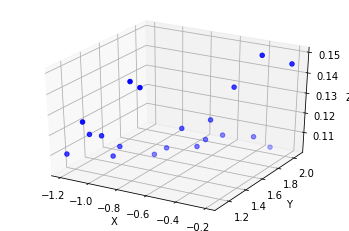

In [ ]:
datapath = "/content/drive/Shareddrives/MC886/P2/data"
dataset = np.genfromtxt(datapath + "/kick1.dat", delimiter=' ') # x,y,z
m = np.shape(dataset)[0]
dataset = np.insert(dataset, 0, [1]*m, axis=1)
print(dataset)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(dataset[:,1], dataset[:,2], dataset[:,3], c="blue") # the data
plt.show()

### Linear Regression

In [ ]:
#polynome is a function structure used to define the polynome
#it is a matrix in which each line represents the the monome coef, i of xi, exp
#example of polynome: 1*x0 - 1*x1 + 1*x1^2 + 2*x2 + 1*x2^2 
polynome = np.array([[0.0, 0, 1],
                     [0.0, 1, 1],
                     [0.0, 2, 1]])

linreg = Regression(polynome) 
linreg.fit(dataset[:,:-1], dataset[:,-1])
print(linreg.polynome)

converged in 53 epochs (0.03884410858154297 seconds)
[[ 0.03071608  0.          1.        ]
 [-0.02671096  1.          1.        ]
 [ 0.04395559  2.          1.        ]]


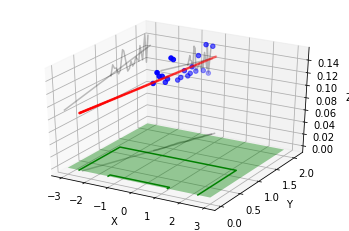

In [ ]:
linreg.plot(dataset[:,:-1], dataset[:,-1])

#### Impact of the learning rate

Vamos utilizar algumas métricas para avaliar o modelo treinado:

*   MSE (Mean squared error)
*   RMSE (Root mean squared error)
*   RAE (Relative absolute error)
*   RSE (Relative squared error)


learning rate = 0.1
converged in 53 epochs (0.032158613204956055 seconds)


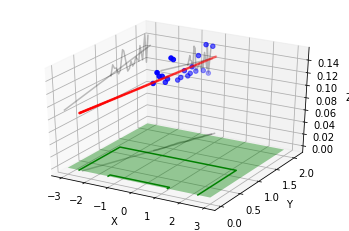

MSE:   0.0001998948823097714
RMSE:  0.014138418663689777
RAE:  1.0277405341772357
RSE:  0.9864532289270207

learning rate = 0.01
converged in 518 epochs (0.25212740898132324 seconds)


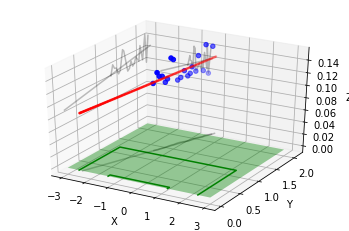

MSE:   0.0001999876420180575
RMSE:  0.014141698696339754
RAE:  1.0278952413863411
RSE:  0.9869109850871376

learning rate = 0.001
converged in 5166 epochs (2.4938290119171143 seconds)


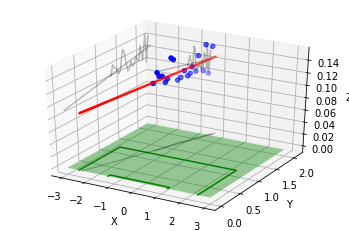

MSE:   0.00019999980938079724
RMSE:  0.0141421288843228
RAE:  1.0279154233622916
RSE:  0.9869710293170021


In [ ]:
# learning rate = 0.1
print("learning rate = 0.1")
polynome = np.array([[0.0, 0, 1],
                     [0.0, 1, 1],
                     [0.0, 2, 1]])
reg = Regression(polynome, learning_rate=0.1) 
reg.fit(dataset[:,:-1], dataset[:,-1])
reg.plot(dataset[:,:-1], dataset[:,-1])
print("MSE:  ", reg.mse(dataset[:,:-1], dataset[:,-1]))
print("RMSE: ", reg.rmse(dataset[:,:-1], dataset[:,-1]))
print("RAE: ", reg.rae(dataset[:,:-1], dataset[:,-1]))
print("RSE: ", reg.rse(dataset[:,:-1], dataset[:,-1]))
print()

# learning rate = 0.01
print("learning rate = 0.01")
polynome = np.array([[0.0, 0, 1],
                     [0.0, 1, 1],
                     [0.0, 2, 1]])
reg = Regression(polynome, learning_rate=0.01) 
reg.fit(dataset[:,:-1], dataset[:,-1])
reg.plot(dataset[:,:-1], dataset[:,-1])
print("MSE:  ", reg.mse(dataset[:,:-1], dataset[:,-1]))
print("RMSE: ", reg.rmse(dataset[:,:-1], dataset[:,-1]))
print("RAE: ", reg.rae(dataset[:,:-1], dataset[:,-1]))
print("RSE: ", reg.rse(dataset[:,:-1], dataset[:,-1]))
print()

# learning rate = 0.001
print("learning rate = 0.001")
polynome = np.array([[0.0, 0, 1],
                     [0.0, 1, 1],
                     [0.0, 2, 1]])
reg = Regression(polynome, learning_rate=0.001) 
reg.fit(dataset[:,:-1], dataset[:,-1])
reg.plot(dataset[:,:-1], dataset[:,-1])
print("MSE:  ", reg.mse(dataset[:,:-1], dataset[:,-1]))
print("RMSE: ", reg.rmse(dataset[:,:-1], dataset[:,-1]))
print("RAE: ", reg.rae(dataset[:,:-1], dataset[:,-1]))
print("RSE: ", reg.rse(dataset[:,:-1], dataset[:,-1]))

Como esperado, quanto menor o learning rate, mais epochs são necessárias para o modelo convergir, aumentando o número de iterações na mesma ordem de magnitude que o learning rate aumenta

### Polynomial Regression

In [ ]:
#polynome is a function structure used to define the polynome
#it is a matrix in which each line represents the the monome coef, i of xi, exp
#example of polynome: e*x0 - d*x1 + c*x1^2 + b*x2 + a*x2^2  -- z = ax2 + bx + cy2 + dy + e
polynome = np.array([[ 0.0, 0, 1],
                     [ 0.0, 1, 1],
                     [-0.5, 1, 2],
                     [ 0.0, 2, 1],
                     [-0.5, 2, 2]])

reg = Regression(polynome) 
reg.fit(dataset[:,:-1], dataset[:,-1])
print(reg.polynome)

converged in 4552 epochs (3.005326509475708 seconds)
[[ 0.04797113  0.          1.        ]
 [-0.02689135  1.          1.        ]
 [-0.00519831  1.          2.        ]
 [ 0.04165843  2.          1.        ]
 [-0.00402733  2.          2.        ]]


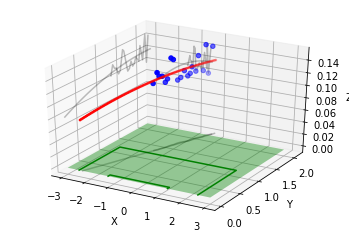

In [ ]:
reg.plot(dataset[:,:-1], dataset[:,-1])

#### Impact of the learning rate

Vamos utilizar algumas métricas para avaliar o modelo treinado:

*   MSE (Mean squared error)
*   RMSE (Root mean squared error)
*   RAE (Relative absolute error)
*   RSE (Relative squared error)

learning rate = 0.1
converged in 4552 epochs (2.9880504608154297 seconds)


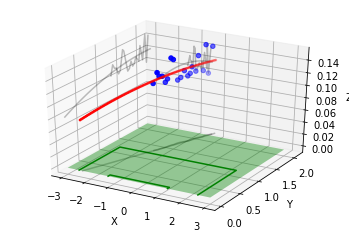

MSE:   0.0001999958167515907
RMSE:  0.014141987722791682
RAE:  1.0287229340061372
RSE:  0.9869513262514349

learning rate = 0.01 / max epochs = 20000
failed to converge in 20000 epochs (12.748932600021362 seconds)


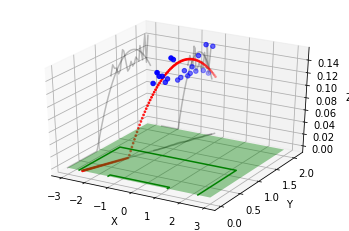

MSE:   0.0003820160433860905
RMSE:  0.019545230706903678
RAE:  1.4489189840202363
RSE:  1.885195634554336

learning rate = 0.001
failed to converge in 10000 epochs (6.384458065032959 seconds)


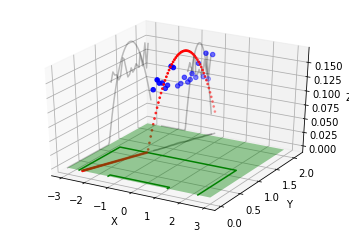

MSE:   0.0013309552544641
RMSE:  0.036482259448451106
RAE:  2.5289098092601505
RSE:  6.56807764737515


In [ ]:
# learning rate = 0.1
print("learning rate = 0.1")
polynome = np.array([[ 0.0, 0, 1],
                     [ 0.0, 1, 1],
                     [-0.5, 1, 2],
                     [ 0.0, 2, 1],
                     [-0.5, 2, 2]])
reg = Regression(polynome, learning_rate=0.1) 
reg.fit(dataset[:,:-1], dataset[:,-1])
reg.plot(dataset[:,:-1], dataset[:,-1])
print("MSE:  ", reg.mse(dataset[:,:-1], dataset[:,-1]))
print("RMSE: ", reg.rmse(dataset[:,:-1], dataset[:,-1]))
print("RAE: ", reg.rae(dataset[:,:-1], dataset[:,-1]))
print("RSE: ", reg.rse(dataset[:,:-1], dataset[:,-1]))
print()


# learning rate = 0.01
print("learning rate = 0.01 / max epochs = 20000")
polynome = np.array([[ 0.0, 0, 1],
                     [ 0.0, 1, 1],
                     [-0.5, 1, 2],
                     [ 0.0, 2, 1],
                     [-0.5, 2, 2]])
reg = Regression(polynome, learning_rate=0.01, max_epochs=20000) 
reg.fit(dataset[:,:-1], dataset[:,-1])
reg.plot(dataset[:,:-1], dataset[:,-1])
print("MSE:  ", reg.mse(dataset[:,:-1], dataset[:,-1]))
print("RMSE: ", reg.rmse(dataset[:,:-1], dataset[:,-1]))
print("RAE: ", reg.rae(dataset[:,:-1], dataset[:,-1]))
print("RSE: ", reg.rse(dataset[:,:-1], dataset[:,-1]))
print()

# learning rate = 0.001
print("learning rate = 0.001")
polynome = np.array([[ 0.0, 0, 1],
                     [ 0.0, 1, 1],
                     [-0.5, 1, 2],
                     [ 0.0, 2, 1],
                     [-0.5, 2, 2]])
reg = Regression(polynome, learning_rate=0.001) 
reg.fit(dataset[:,:-1], dataset[:,-1])
reg.plot(dataset[:,:-1], dataset[:,-1])
print("MSE:  ", reg.mse(dataset[:,:-1], dataset[:,-1]))
print("RMSE: ", reg.rmse(dataset[:,:-1], dataset[:,-1]))
print("RAE: ", reg.rae(dataset[:,:-1], dataset[:,-1]))
print("RSE: ", reg.rse(dataset[:,:-1], dataset[:,-1]))

Como esse dataset tem uma característica mais linear, o modelo polinomial não converge para learning rates menores que 0.1 (foi estipulado um limite de 10000 epochs para o primeiro e o terceiro treino e 20000 para o segundo), evidenciando o impacto que o learning rate pode ter no tempo de treinamento

### Impact of the model complexity

Observando-se a tendência dos dados para esse dataset, pode-se afirmar que um modelo linear seria o mais adequado para representá-los.

Analisando-se os gráficos e as métricas apresentadas, nota-se que, o modelo linear teve a melhor "pontuação" (menores erros) e, por mais que o modelo polinomial tenha convergido apresentando erros baixos, a curva obtida é praticamente linear, indicando que os termos polinomiais tiveram pouco impacto no resultado.

Por outro lado, quando variamos o learning rate para valores menores e limitamos o número de epochs, o impacto da complexidade do modelo torna-se mais evidente. O modelo linear convergiu em todos os casos testados rapidamente com erros baixos, já o polinomial, não convergiu para learning rates menores (pois foi imposto um limite de epochs), apresentando erros muito maiores e resultando em uma parábola que não representa os dados de maneira aceitável.

### Will defend goal?

Sabemos que o chute do oponente partiu do ponto inicial (X, Y, Z) = (0.0, 2.1, 0.0). Para dizer que o goleiro irá defender o gol, o modelo deve ter um erro relativamente baixo e convergir antes que a bola chegue ao gol, ou seja, antes que atinja o ponto Y=0. 

Abaixo, fazemos o cálculo do tempo que a bola leva para chegar ao gol, após a coleta de dados.

In [ ]:
y_final = dataset[-1][2]
y_inicial = 2.1
y_gol = 0.0

dy = y_final - y_inicial ## em metros
dt = 1/3 ## em segundos

vel_y = dy / dt

tempo_disponivel = (y_gol - y_final) / vel_y
print(f"Tempo disponível para convergência: {tempo_disponivel:.3f} segundos")

Tempo disponível para convergência: 0.373 segundos


**Linear Regression**

Pode-se perceber que, dos modelos lineares treinados, aqueles com learning_rate igual a 0.1 e 0.01 convergiram em 0.025 segundos e 0.26 segundos,  respectivamente (tempos menores que 0.373 segundos).
Além disso, as métricas utilizadas apresentaram bom resultado, indicando um erro baixo no modelo.  
Com isso, conclui-se que seria possível defender o gol para o modelo linear.

**Polinomial Regression**

Pode-se perceber que, dos modelos polinomiais treinados, dois deles não convergiram, e o único que convergiu, apresentou um tempo de 2.8 segundos, muito maior que o tempo disponível de 0.373 segundos. 
Com isso, conclui-se que, para o modelo polinomial não seria possível defender o gol

## kick2.dat

### The data

[[ 1.    -0.105  2.048  0.145]
 [ 1.    -0.162  1.999  0.177]
 [ 1.    -0.184  1.968  0.172]
 [ 1.    -0.185  1.902  0.167]
 [ 1.    -0.23   1.841  0.192]
 [ 1.    -0.266  1.807  0.219]
 [ 1.    -0.287  1.733  0.213]
 [ 1.    -0.311  1.69   0.223]
 [ 1.    -0.309  1.649  0.25 ]
 [ 1.    -0.331  1.611  0.244]
 [ 1.    -0.391  1.568  0.233]
 [ 1.    -0.431  1.523  0.269]
 [ 1.    -0.441  1.438  0.283]
 [ 1.    -0.445  1.408  0.29 ]
 [ 1.    -0.484  1.34   0.263]
 [ 1.    -0.514  1.295  0.29 ]
 [ 1.    -0.516  1.244  0.28 ]
 [ 1.    -0.524  1.201  0.281]
 [ 1.    -0.552  1.159  0.296]
 [ 1.    -0.596  1.109  0.269]]


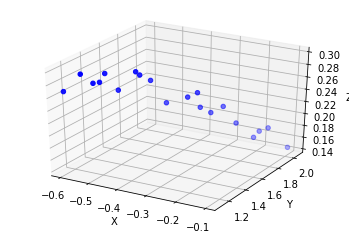

In [ ]:
datapath = "/content/drive/Shareddrives/MC886/P2/data"
dataset = np.genfromtxt(datapath + "/kick2.dat", delimiter=' ') # x,y,z
m = np.shape(dataset)[0]
dataset = np.insert(dataset, 0, [1]*m, axis=1)
print(dataset)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(dataset[:,1], dataset[:,2], dataset[:,3], c="blue") # the data
plt.show()

### Linear Regression

In [ ]:
#polynome is a function structure used to define the polynome
#it is a matrix in which each line represents the the monome coef, i of xi, exp
#example of polynome: 1*x0 - 1*x1 + 1*x1^2 + 2*x2 + 1*x2^2 
polynome = np.array([[0.0, 0, 1],
                     [0.0, 1, 1],
                     [0.0, 2, 1]])

linreg = Regression(polynome) 
linreg.fit(dataset[:,:-1], dataset[:,-1])
print(linreg.polynome)

failed to converge in 10000 epochs (4.7927045822143555 seconds)
[[ 0.18335448  0.          1.        ]
 [-0.25381877  1.          1.        ]
 [-0.023929    2.          1.        ]]


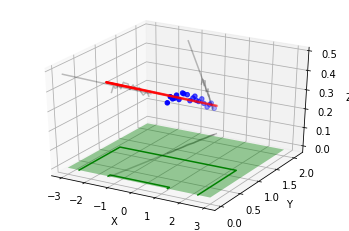

In [ ]:
linreg.plot(dataset[:,:-1], dataset[:,-1])

#### Impact of the learning rate

Vamos utilizar algumas métricas para avaliar o modelo treinado:

*   MSE (Mean squared error)
*   RMSE (Root mean squared error)
*   RAE (Relative absolute error)
*   RSE (Relative squared error)

learning rate = 0.1
failed to converge in 10000 epochs (4.688060760498047 seconds)


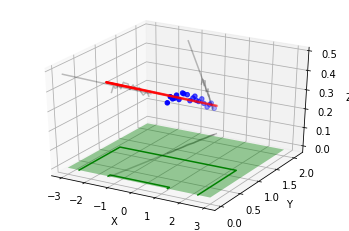

MSE:   0.0002585044290112718
RMSE:  0.01607807292592218
RAE:  0.3144210194361523
RSE:  0.12235390153698093

learning rate = 0.01
failed to converge in 10000 epochs (4.696170091629028 seconds)


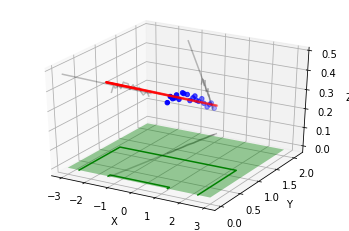

MSE:   0.0002592925844953649
RMSE:  0.016102564531631752
RAE:  0.31591274439493267
RSE:  0.12272694697711282

learning rate = 0.001
failed to converge in 10000 epochs (4.737333297729492 seconds)


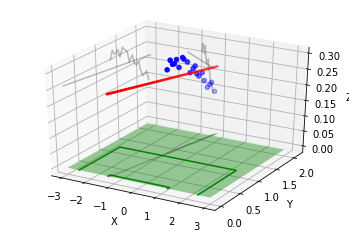

MSE:   0.0017808097730988852
RMSE:  0.04219964185984148
RAE:  0.9312617766433985
RSE:  0.8428831353768933


In [ ]:
# learning rate = 0.1
print("learning rate = 0.1")
polynome = np.array([[0.0, 0, 1],
                     [0.0, 1, 1],
                     [0.0, 2, 1]])
reg = Regression(polynome, learning_rate=0.1) 
reg.fit(dataset[:,:-1], dataset[:,-1])
reg.plot(dataset[:,:-1], dataset[:,-1])
print("MSE:  ", reg.mse(dataset[:,:-1], dataset[:,-1]))
print("RMSE: ", reg.rmse(dataset[:,:-1], dataset[:,-1]))
print("RAE: ", reg.rae(dataset[:,:-1], dataset[:,-1]))
print("RSE: ", reg.rse(dataset[:,:-1], dataset[:,-1]))
print()

# learning rate = 0.01
print("learning rate = 0.01")
polynome = np.array([[0.0, 0, 1],
                     [0.0, 1, 1],
                     [0.0, 2, 1]])
reg = Regression(polynome, learning_rate=0.01) 
reg.fit(dataset[:,:-1], dataset[:,-1])
reg.plot(dataset[:,:-1], dataset[:,-1])
print("MSE:  ", reg.mse(dataset[:,:-1], dataset[:,-1]))
print("RMSE: ", reg.rmse(dataset[:,:-1], dataset[:,-1]))
print("RAE: ", reg.rae(dataset[:,:-1], dataset[:,-1]))
print("RSE: ", reg.rse(dataset[:,:-1], dataset[:,-1]))
print()

# learning rate = 0.001
print("learning rate = 0.001")
polynome = np.array([[0.0, 0, 1],
                     [0.0, 1, 1],
                     [0.0, 2, 1]])
reg = Regression(polynome, learning_rate=0.001) 
reg.fit(dataset[:,:-1], dataset[:,-1])
reg.plot(dataset[:,:-1], dataset[:,-1])
print("MSE:  ", reg.mse(dataset[:,:-1], dataset[:,-1]))
print("RMSE: ", reg.rmse(dataset[:,:-1], dataset[:,-1]))
print("RAE: ", reg.rae(dataset[:,:-1], dataset[:,-1]))
print("RSE: ", reg.rse(dataset[:,:-1], dataset[:,-1]))

Como o segundo dataset (kick 2) apresenta uma característica não-linear (polinomial), o modelo de regressão linear não converge para nenhuma das learning rates apresentadas. Apesar disso, pode-se notar que o treinamento com learning rates maiores convergiu para retas que se adequam melhor aos dados

### Polynomial Regression

In [ ]:
#polynome is a function structure used to define the polynome
#it is a matrix in which each line represents the the monome coef, i of xi, exp
#example of polynome: 1*x0 - 1*x1 + 1*x1^2 + 2*x2 + 1*x2^2 
polynome = np.array([[ 0.0, 0, 1],
                     [ 0.0, 1, 1],
                     [-0.5, 1, 2],
                     [ 0.0, 2, 1],
                     [-0.5, 2, 2]])

reg = Regression(polynome) 
reg.fit(dataset[:,:-1], dataset[:,-1])
print(reg.polynome)

converged in 183 epochs (0.12092757225036621 seconds)
[[ 0.23147855  0.          1.        ]
 [-0.12593881  1.          1.        ]
 [-0.43324924  1.          2.        ]
 [ 0.28125893  2.          1.        ]
 [-0.1624809   2.          2.        ]]


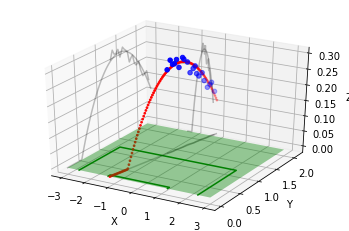

In [ ]:
reg.plot(dataset[:,:-1], dataset[:,-1])

#### Impact of the learning rate

Vamos utilizar algumas métricas para avaliar o modelo treinado:

*   MSE (Mean squared error)
*   RMSE (Root mean squared error)
*   RAE (Relative absolute error)
*   RSE (Relative squared error)

learning rate = 0.1
converged in 183 epochs (0.11949634552001953 seconds)


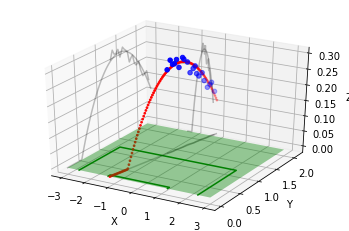

MSE:   0.0001999311454083642
RMSE:  0.01413970103673922
RAE:  0.3094420070305189
RSE:  0.09463031551542257

learning rate = 0.01
converged in 1831 epochs (1.2384166717529297 seconds)


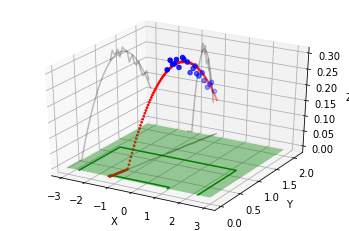

MSE:   0.00019999942269069882
RMSE:  0.014142115212750135
RAE:  0.30950122558070176
RSE:  0.09466263214501354

learning rate = 0.001
failed to converge in 10000 epochs (6.369822978973389 seconds)


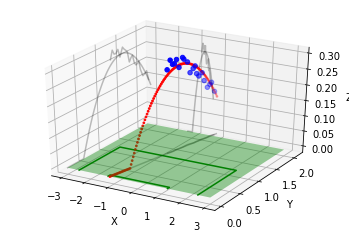

MSE:   0.0002829280547708235
RMSE:  0.016820465355358735
RAE:  0.3595872311021612
RSE:  0.13391395841024228


In [ ]:
# learning rate = 0.1
print("learning rate = 0.1")
polynome = np.array([[ 0.0, 0, 1],
                     [ 0.0, 1, 1],
                     [-0.5, 1, 2],
                     [ 0.0, 2, 1],
                     [-0.5, 2, 2]])
reg = Regression(polynome, learning_rate=0.1) 
reg.fit(dataset[:,:-1], dataset[:,-1])
reg.plot(dataset[:,:-1], dataset[:,-1])
print("MSE:  ", reg.mse(dataset[:,:-1], dataset[:,-1]))
print("RMSE: ", reg.rmse(dataset[:,:-1], dataset[:,-1]))
print("RAE: ", reg.rae(dataset[:,:-1], dataset[:,-1]))
print("RSE: ", reg.rse(dataset[:,:-1], dataset[:,-1]))
print()

# learning rate = 0.01
print("learning rate = 0.01")
polynome = np.array([[ 0.0, 0, 1],
                     [ 0.0, 1, 1],
                     [-0.5, 1, 2],
                     [ 0.0, 2, 1],
                     [-0.5, 2, 2]])
reg = Regression(polynome, learning_rate=0.01) 
reg.fit(dataset[:,:-1], dataset[:,-1])
reg.plot(dataset[:,:-1], dataset[:,-1])
print("MSE:  ", reg.mse(dataset[:,:-1], dataset[:,-1]))
print("RMSE: ", reg.rmse(dataset[:,:-1], dataset[:,-1]))
print("RAE: ", reg.rae(dataset[:,:-1], dataset[:,-1]))
print("RSE: ", reg.rse(dataset[:,:-1], dataset[:,-1]))
print()

# learning rate = 0.001
print("learning rate = 0.001")
polynome = np.array([[ 0.0, 0, 1],
                     [ 0.0, 1, 1],
                     [-0.5, 1, 2],
                     [ 0.0, 2, 1],
                     [-0.5, 2, 2]])
reg = Regression(polynome, learning_rate=0.001) 
reg.fit(dataset[:,:-1], dataset[:,-1])
reg.plot(dataset[:,:-1], dataset[:,-1])
print("MSE:  ", reg.mse(dataset[:,:-1], dataset[:,-1]))
print("RMSE: ", reg.rmse(dataset[:,:-1], dataset[:,-1]))
print("RAE: ", reg.rae(dataset[:,:-1], dataset[:,-1]))
print("RSE: ", reg.rse(dataset[:,:-1], dataset[:,-1]))

Pode-se notar que o dataset apresenta um caráter não-linear, de forma que o modelo polinomial converge para uma curva que se adequa muito bem aos pontos. Apesar disso, é visível a diferença em número de epochs para os diferentes lerning rates, sendo que o último nem converge para somente 10000 epochs

### Impact of the model complexity

Observando-se a tendência dos dados para esse dataset, pode-se afirmar que um modelo polinomial seria o mais adequado para representá-los.

Analisando-se os gráficos e as métricas apresentadas, nota-se que, o modelo polinomial convergiu e teve a melhor "pontuação" (menores erros), enquanto que o modelo linear não convergiu para nenhum dos casos testados com os mesmos parâmetros (learning_rate, tolerance e max_epochs).

Além disso, quando variamos o learning rate no caso linear o impacto da complexidade do modelo torna-se mais evidente. Um exemplo disso é o último caso testado, o qual resultou em uma reta muito fora da tendência dos dados.

### Will defend goal?

Sabemos que o chute do oponente partiu do ponto inicial (X, Y, Z) = (0.0, 2.1, 0.0). Para dizer que o goleiro irá defender o gol, o modelo deve ter um erro relativamente baixo e convergir antes que a bola chegue ao gol, ou seja, antes que atinja o ponto Y=0. 

Abaixo, fazemos o cálculo do tempo que a bola leva para chegar ao gol, após a coleta de dados.

In [ ]:
y_final = dataset[-1][2]
y_inicial = 2.1
y_gol = 0.0

dy = y_final - y_inicial ## em metros
dt = 1/3 ## em segundos

vel_y = dy / dt

tempo_disponivel = (y_gol - y_final) / vel_y
print(f"Tempo disponível para convergência: {tempo_disponivel:.3f} segundos")

Tempo disponível para convergência: 0.373 segundos


**Linear Regression**

Nenhum dos modelos treinados convergiu para o limite de epochs de 10 mil. E, mesmo assim, o tempo de treinamento foi de 4.6 segundos, muito maior que o tempo limite para treiná-los, de 0.373 segundos.
Com isso, conclui-se que, para o modelo linear não seria possível defender o gol.

**Polinomial Regression**

Pode-se perceber que, dos modelos polinomiais treinados, dois deles convergiram. Dentre estes, o único que estava dentro do tempo limite foi aquele com learning rate maior de 0.1, com tempo de convergência igual a 0.11 segundos. Já o outro, com learning rate igual a 0.01, levou 1.2 segundos. 
Nota-se também que o erros apresentados foram pequenos.  
Assim conclui-se que, com o modelo polinomial, seria possível defender o gol, utilizando learning rate de 0.1.

# Part2

## Load and pre-process data

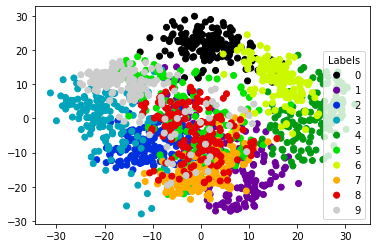

In [ ]:
# load data
x, y = load_digits(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1) 

# apply PCA for visualization
pca = decomposition.PCA(n_components=2)
pca.fit(x_train)
df_train_pca = pca.transform(x_train)
df_test_pca = pca.transform(x_test)

# plot
fig, ax = plt.subplots()
colors = cm.nipy_spectral(y_train.astype(float) / y_train.max())
for i in range(10):
    mask = y_train == i
    ax.scatter(df_train_pca[mask][:,:1], df_train_pca[mask][:,1:], c=colors[mask], label=i) # the data

ax.legend(loc="lower right", title="Labels")

plt.show()

## Logistic Regression

### Train set

In [ ]:
clf = LogisticRegressionCV(cv=10, max_iter=10000).fit(x_train, y_train)
y_predicted = clf.predict(x_train)
print("Y train: ")
print(y_train)
print("Y predicted: ")
print(y_predicted)

Y train: 
[5 5 4 ... 2 9 4]
Y predicted: 
[5 5 4 ... 2 9 4]


Metrics

Accuracy:  0.9876314162028448
Precision:  0.9877513854633508
Recall:  0.9876314162028448
F1-score:  0.98765929411154


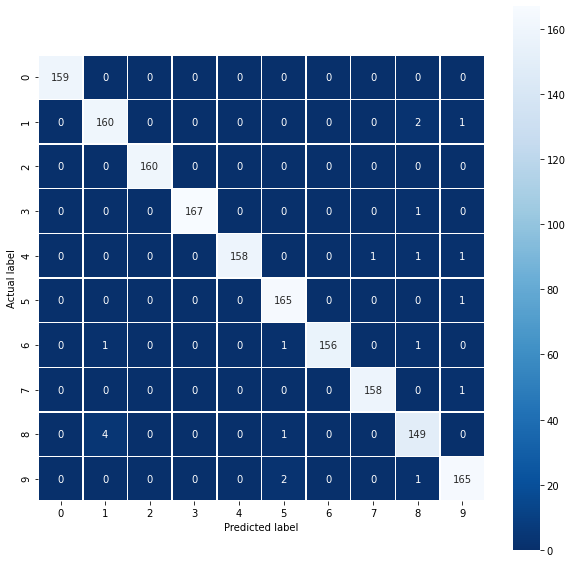

In [ ]:
# accuracy
print("Accuracy: ", accuracy_score(y_train, y_predicted))

# precision
print("Precision: ", precision_score(y_train, y_predicted, average='weighted'))

# recall
print("Recall: ", recall_score(y_train, y_predicted, average='weighted'))

# f1-score
print("F1-score: ", f1_score(y_train, y_predicted, average='weighted'))

# confusion matrix
cm = confusion_matrix(y_true=y_train, y_pred=y_predicted, labels=clf.classes_)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, linewidths=.5, fmt=".0f", square=True, cmap='Blues_r');
plt.xlabel('Predicted label')
_ = plt.ylabel('Actual label')


### Test set

In [ ]:
y_predicted = clf.predict(x_test)
print("Y test: ")
print(y_test)
print("Y predicted: ")
print(y_predicted)

Y test: 
[5 4 7 6 3 3 7 4 2 4 1 5 6 0 7 9 5 7 4 8 8 5 0 6 9 1 1 7 6 6 4 8 0 4 4 2 7
 6 6 7 7 9 9 2 8 1 2 6 3 3 1 7 8 2 1 0 2 6 6 1 7 4 5 6 2 3 3 6 9 7 8 7 5 9
 2 8 2 3 4 0 1 5 8 0 3 3 0 8 4 4 1 0 0 4 0 5 8 6 3 2 7 0 6 4 5 7 7 1 6 3 5
 8 1 9 3 2 8 1 8 3 6 1 9 3 7 8 1 8 4 2 5 0 6 7 0 4 5 6 5 1 0 5 3 4 0 4 7 7
 1 2 4 6 4 6 7 9 0 8 2 5 0 9 0 8 2 8 6 1 9 0 1 4 2 5 6 8 9 1 2 8]
Y predicted: 
[5 4 7 6 3 3 7 4 2 4 1 5 6 0 7 9 5 7 4 8 8 5 4 6 9 1 1 7 6 6 4 8 0 4 4 2 7
 6 6 7 7 9 9 2 1 1 2 6 3 3 1 7 8 2 1 0 2 6 6 1 7 4 5 6 2 3 3 1 9 7 8 7 5 9
 2 8 2 3 4 0 1 5 8 0 3 3 0 8 4 4 1 0 0 4 0 5 8 6 3 2 7 0 6 4 5 7 7 1 6 3 5
 8 1 9 3 2 8 1 8 3 6 1 9 8 7 8 1 8 4 2 5 0 6 7 0 4 5 6 5 1 0 5 3 8 0 4 7 7
 1 2 4 6 4 6 7 9 0 8 2 5 0 9 0 5 2 8 6 1 9 0 1 4 2 5 6 8 9 1 2 8]


Metrics

Accuracy:  0.9666666666666667
Precision:  0.9680516651104887
Recall:  0.9666666666666667
F1-score:  0.9667931595297274


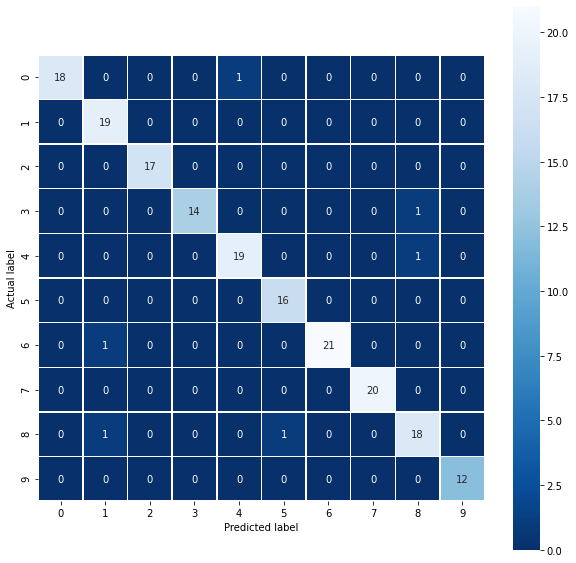

In [ ]:
# accuracy
print("Accuracy: ", accuracy_score(y_test, y_predicted))

# precision
print("Precision: ", precision_score(y_test, y_predicted, average='weighted'))

# recall
print("Recall: ", recall_score(y_test, y_predicted, average='weighted'))

# f1-score
print("F1-score: ", f1_score(y_test, y_predicted, average='weighted'))

# confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_predicted, labels=clf.classes_)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap='Blues_r');
plt.xlabel('Predicted label')
_ = plt.ylabel('Actual label')

## Linear Regression

### Train set

In [ ]:
result = cross_validate(LinearRegression(), x_train, y_train, return_estimator=True, cv=10)
max_index = result['test_score'].argmax()
regression = result['estimator'][max_index]

y_predicted = regression.predict(x_train).astype(int)
print("Y train: ")
print(y_train)
print("Y predicted: ")
print(y_predicted)

Y train: 
[5 5 4 ... 2 9 4]
Y predicted: 
[3 4 3 ... 2 6 0]


Metrics

Accuracy:  0.22572665429808286
Precision:  0.29736054534225737
Recall:  0.22572665429808286
F1-score:  0.22441951201193555


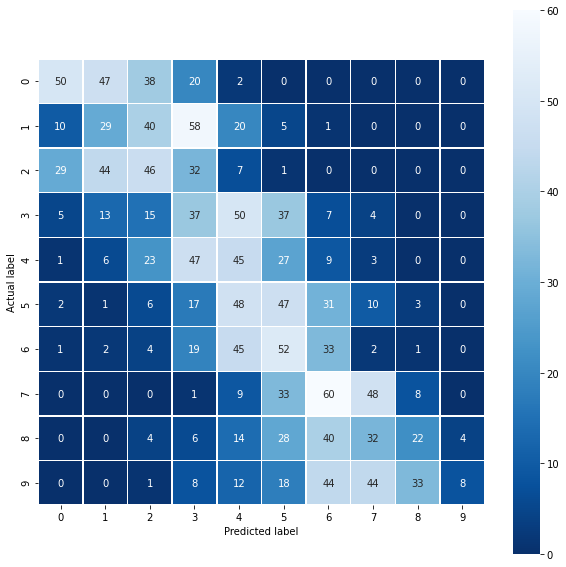

In [ ]:
# accuracy
print("Accuracy: ", accuracy_score(y_train, y_predicted))

# precision
print("Precision: ", precision_score(y_train, y_predicted, average='weighted'))

# recall
print("Recall: ", recall_score(y_train, y_predicted, average='weighted', zero_division=0))

# f1-score
print("F1-score: ", f1_score(y_train, y_predicted, average='weighted', zero_division=0))

# confusion matrix
cm = confusion_matrix(y_true=y_train, y_pred=y_predicted, labels=np.unique(y_train))

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap='Blues_r');
plt.xlabel('Predicted label')
_ = plt.ylabel('Actual label')

### Test set

In [ ]:
y_predicted = regression.predict(x_test).astype(int)
print("Y test: ")
print(y_test)
print("Y predicted: ")
print(y_predicted)

Y test: 
[5 4 7 6 3 3 7 4 2 4 1 5 6 0 7 9 5 7 4 8 8 5 0 6 9 1 1 7 6 6 4 8 0 4 4 2 7
 6 6 7 7 9 9 2 8 1 2 6 3 3 1 7 8 2 1 0 2 6 6 1 7 4 5 6 2 3 3 6 9 7 8 7 5 9
 2 8 2 3 4 0 1 5 8 0 3 3 0 8 4 4 1 0 0 4 0 5 8 6 3 2 7 0 6 4 5 7 7 1 6 3 5
 8 1 9 3 2 8 1 8 3 6 1 9 3 7 8 1 8 4 2 5 0 6 7 0 4 5 6 5 1 0 5 3 4 0 4 7 7
 1 2 4 6 4 6 7 9 0 8 2 5 0 9 0 8 2 8 6 1 9 0 1 4 2 5 6 8 9 1 2 8]
Y predicted: 
[4 4 7 5 0 7 7 4 0 5 3 3 4 2 6 6 6 6 5 5 7 3 5 7 7 2 2 3 7 4 3 7 1 3 4 3 5
 6 4 5 4 9 7 2 1 3 0 5 3 3 2 6 6 4 3 2 2 4 6 3 6 3 4 5 2 4 4 2 5 3 5 3 6 5
 2 6 2 1 5 2 2 5 4 3 6 1 2 6 1 8 3 2 1 2 1 5 6 3 3 1 6 1 3 1 4 5 7 1 4 2 4
 6 2 5 3 2 6 4 5 4 4 1 5 6 5 7 3 6 5 2 6 1 6 5 1 2 3 3 7 1 2 3 4 8 0 2 7 5
 1 3 4 5 4 5 5 6 1 6 1 5 3 8 1 2 2 7 3 1 6 2 4 2 0 5 5 4 5 0 3 8]


Metrics

Accuracy:  0.2
Precision:  0.2590016014920229
Recall:  0.2
F1-score:  0.18675670557852994


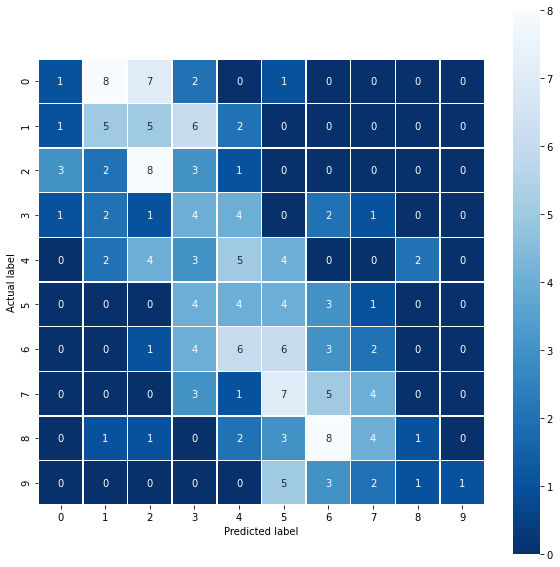

In [ ]:
# accuracy
print("Accuracy: ", accuracy_score(y_test, y_predicted))

# precision
print("Precision: ", precision_score(y_test, y_predicted, average='weighted'))

# recall
print("Recall: ", recall_score(y_test, y_predicted, average='weighted', zero_division=0))

# f1-score
print("F1-score: ", f1_score(y_test, y_predicted, average='weighted', zero_division=0))

# confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_predicted, labels=np.unique(y_test))

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap='Blues_r');
plt.xlabel('Predicted label')
_ = plt.ylabel('Actual label')

## Discussion and evaluation

<h1> Parte 1 </h1>

**Normalização**

A normalização não se aplica nos casos da parte 1, pois senão, as curvas geradas para prever a trajetória da bola também estariam normalizadas e a predição do goleiro não seria correta.

**Qualidade dos resultados**

Para ambos os datasets estudados, cada um apresentou diferentes resultados para cada método utilizado. Por exemplo, o dataset 1 apresentou melhor suscetibilidade para ser modelado utilizando a Regressão Linear, pois a convergência ocorreu em um tempo menor, e utilizando menos épocas, quando comparado ao modelo de Regressão Polinomial. Por outro lado, de forma análoga, a Regressão Polinomial que se mostrou mais suscetível para modelar o dataset 2.

Vale ressaltar que ambos os datasets têm uma quantidade de dados muito pequena, então não é possível saber com certeza (em caso de uma situação real) se a qualidade dos resultados é alta o suficiente para que possamos afirmar que o goleiro irá conseguir defender o gol, de fato. Por exemplo, para o dataset 1, os dados apresentados quase formam uma reta, se analisados de certo ângulo, mas como sabemos, uma reta nunca conseguiria descrever a trajetória de um objeto sujeito à ação da gravidade. Então, por mais que a Regressão Linear tenha se apresentado melhor para modelar o dataset 1 (como descrito no parágrafo anterior), sabemos que tal modelagem não seria perfeita para representar a trajetória da bola. 

**Vantagens e Desvantagens**

Cada regressão apresentou suas vantagens e desvantagens. Independente da regressão escolhida para modelar dados em um dataset, sabemos que os "chutes iniciais" são muito importantes, pois eles ditarão a sequência de descida do gradiente até chegar ao mínimo local. Então, dependendo do chute inicial, o mínimo local pode ser inadequado para representar os dados após a modelagem. Nesse sentido, uma regressão linear, é mais simples pois a quantidade de coeficientes geralmente são menores e eles estão sujeitos à uma descida do gradiente de forma proporcional, o que talvez possa tornar a predição dos chutes iniciais mais fácil de ser feita. Por outro lado, a regressão polinomial, possa encontrar resultados melhores e que se encaixam mais, graças à sua versatilidade de escolha dos "pesos" de cada feature para modelar os dados.   

O que podemos perceber é que a regressão linear se mostrou mais vantajosa para o dataset 1, pois os dados apresentam uma tendência para a formação de uma reta, enquanto que a regressão polinomial se apresentou mais vantajosa para o segundo dataset.


<h1> Parte 2 </h1>
Não foi feita a normalização dos dados pois todas as features são representadas por números no mesmo intervalos de 0 a 16. Dessa forma, observou-se uma precisão, acurácia e recall de 98% na regressão logística. Já para a regressão linear, não observou-se nenhuma melhora nas métricas apresentadas com a normalização (por volta de 22%).

**Logistic Regression**

Analisando-se o heatmap apresentado, pode-se notar que a grande maioria dos dados foram realmente previstos de maneira correta (alto recall e acurácia - 98%). 

Além disso, temos uma alta precisão (98%), indicando que a maioria das classificações do modelo estavam corretas.

Olhando para a matriz de confusão, nota-se uma diagonal principal bem definida, de modo que o modelo de regressão logística apresentou bom resultado para essa tarefa de classificação.

**Linear Regression**

Nenhuma das métricas apresentou bom resultado, tanto para o conjunto de treinamento como para o conjunto de testes (ambos com métricas em torno de 23%).

Analisando-se a matriz de confusão, podemos perceber uma leve tendência para a formação de uma diagonal principal, porém ainda há muitos pontos classificados de maneira errônea, de modo que um modelo linear mostrou-se inadequado para a classifcaçao de um dataset dessa natureza.
